# MAGIC gamma telescope data 2004
    
Набор данных представляет из себя параметры объектов, обнаруженных наземным черенковским телескопом MAGIC (Major Atmospheric Gamma-ray Imaging Cherenkov Telescope). Он обнаруживает потоки частиц, выпущенных гамма-лучами, используя эффект Черенкова-Вавилова, то есть излучение, вызываемое в прозрачной среде заряженной частицей, которая движется со скоростью, превышающей фазовую скорость распространения света в этой среде.

Признаки:  
        - `fLength`: Большая ось эллипса (в мм)  
        - `fWidth`: Малая ось эллипса (в мм)  
        - `fSize`: Десятичный логарифм суммы значений всех пикселей (в фотах)  
        - `fConc`: Соотнношение суммы двух наивысших значений пикселей с fSize  
        - `fConc1`: Соотнношение наивысшего значения пикселея с fSize  
        - `fAsym`: Расстояние от пикселя с наивысшем значением до центра, спроецированное на большую ось (в мм)  
        - `fM3Long`: Третий корень третьего момента вдоль большой оси эллипса (в мм)  
        - `fM3Trans`: Третий корень третьего момента вдоль малой оси эллипса (в мм)  
        - `fAlpha`: Угол большой оси эллипса с вектором до начала (в градусах)  
        - `fDist`: Расстояние от начала до центра эллипса (в мм)  
        
Класс объекта - сигнал(g) или фоновый(h).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('telescope_data.csv', sep = ',', engine = 'python')

data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Посчитаем средние значения по каждому столбцу, среднеквадратичное отклонение, минимальные и максимальные значения, а также о квартилях:

In [3]:
data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


Диаграммы рассеяния:

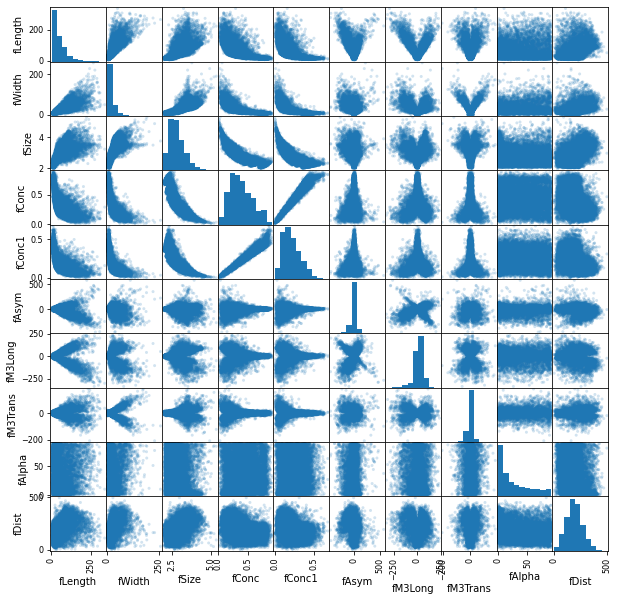

In [4]:
from pandas.plotting import scatter_matrix 
scatter_matrix(data, alpha = .2, figsize = (10, 10))
pass

Построим матрицу корреляций:

In [5]:
data.corr()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000


Видна корреляция между параметром fSize объекта и его разметами fLength и fWidth. Также сильно кореллируют fConc и fConc1.

Построение графика зависимости десятичного логарифма суммы значений всех пикселей от размера большой оси эллипса:

Text(0, 0.5, 'fLength')

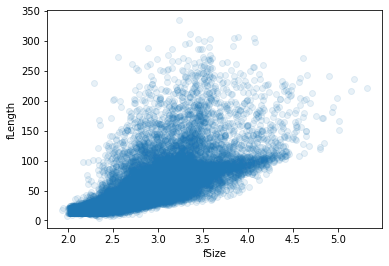

In [6]:
plt.plot(data['fSize'], data['fLength'], 'o', alpha = 0.1)
plt.xlabel('fSize')
plt.ylabel('fLength')

Построение графика зависимости десятичного логарифма суммы значений всех пикселей от размера малой оси эллипса:

Text(0, 0.5, 'fWidth')

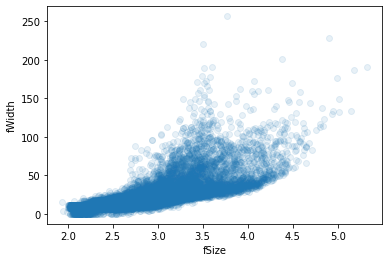

In [7]:
plt.plot(data['fSize'], data['fWidth'], 'o', alpha = 0.1)
plt.xlabel('fSize')
plt.ylabel('fWidth')

Проверка наличия пропущенных значений.

In [8]:
data.count()

fLength     19020
fWidth      19020
fSize       19020
fConc       19020
fConc1      19020
fAsym       19020
fM3Long     19020
fM3Trans    19020
fAlpha      19020
fDist       19020
class       19020
dtype: int64

Пропущенные значения отсутствуют.

# Подготовка данных  

Из приведенных данных видно, что все, кроме одного, признаки являются количественными, т. к. представляют карактеристики объектов в миллиметрах, градусах, фотах или соотношение характеристик. Класс объекта является категориальным признаком (бинарным).

In [9]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(numerical_columns)

['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']


## Нормализация количественных признаков

In [10]:
data_binary = data['class']
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data = pd.concat((data_numerical, data_binary), axis = 1)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,-0.577211,-0.336795,-0.381120,0.062758,-0.148919,0.541028,0.224812,-0.405831,0.476803,-1.497826,g
1,-0.510955,-0.570012,-0.648578,0.820362,1.471737,0.516906,0.260357,-0.490081,-0.815397,0.153121,g
2,2.568210,6.205695,2.615714,-1.875834,-1.773194,2.044938,-1.478497,-2.182972,1.889174,0.842613,g
3,-0.694749,-0.687241,-1.029451,1.282035,1.606566,0.532757,-0.333506,-0.355350,-0.658786,-1.031436,g
4,0.516609,0.476371,0.711138,-0.347497,-0.284652,-0.020200,0.353077,1.036593,-0.881016,2.176369,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,-0.752170,-0.613972,-0.442060,1.123403,1.617424,0.330938,0.019195,0.126126,-0.966257,-1.164059,h
19016,-0.573706,-0.843722,-1.180319,0.846618,0.576802,0.699478,0.051760,-0.154264,2.266038,0.717740,h
19017,0.523909,1.381743,1.318842,-1.305306,-1.445625,-0.084862,0.598247,-0.466496,0.101633,0.838981,h
19018,1.587716,2.982703,2.473310,-1.564040,-1.324370,0.171199,-2.040543,-3.077125,2.185202,2.870245,h


In [11]:
data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04
mean,-4.303603e-15,3.753698e-15,7.310147e-15,1.457771e-14,2.879155e-15,5.977226e-18,-1.231309e-15,4.408204e-17,-2.402845e-15,-7.680735e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.155832e+00,-1.209032e+00,-1.869910e+00,-2.008756e+00,-1.939694e+00,-7.661113e+00,-6.712250e+00,-9.897733e+00,-1.059076e+00,-2.576353e+00
25%,-6.825033e-01,-5.623643e-01,-7.361785e-01,-7.905726e-01,-7.798526e-01,-2.745463e-01,-4.585934e-01,-5.329076e-01,-8.465409e-01,-6.867998e-01
50%,-3.800899e-01,-2.747766e-01,-1.807389e-01,-1.431903e-01,-1.643019e-01,1.409449e-01,9.350087e-02,1.999641e-02,-3.817940e-01,-2.631513e-02
75%,3.982551e-01,1.394582e-01,5.852387e-01,6.748581e-01,6.385608e-01,4.796037e-01,4.959254e-01,5.135869e-01,6.986710e-01,6.255143e-01
max,6.631130e+00,1.276574e+01,5.286268e+00,2.804355e+00,4.167401e+00,9.789073e+00,4.466175e+00,8.623301e+00,2.388722e+00,4.037679e+00


# Обучающая и тестовая выборка

In [12]:
X = data.drop(('class'), axis = 1)
y = data['class']
feature_names = X.columns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print((N_train, N_test))
print(N_train + N_test)

(15216, 3804)
19020


# Метод k-ближайших соседей

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print("Ошибка на обучающем датасете: {}".format(err_train))
print("Ошибка на тестовом датасете: {}".format(err_test))

Ошибка на обучающем датасете: 0.1456361724500526
Ошибка на тестовом датасете: 0.16035751840168244


Матрица ошибок:

In [14]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[2390   82]
 [ 528  804]]


## Подбор параметра

In [15]:
from sklearn.model_selection import GridSearchCV
nnb = [x for x in range(1, 20)]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=3)
grid.fit(X_train, y_train)
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_n_neighbors)

11


Оптимальное значение параметра - 11. Вычислим значение ошибки с найденным параметром:

In [16]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("Ошибка на обучающем датасете: {}".format(err_train))
print("Ошибка на тестовом датасете: {}".format(err_test))
print("Матрица ошибок:")
print(confusion_matrix(y_test, knn.predict(X_test)))

Ошибка на обучающем датасете: 0.14050998948475288
Ошибка на тестовом датасете: 0.15615141955835962
Матрица ошибок:
[[2372  100]
 [ 494  838]]


Тренировочная и тестовая ошибки уменьшились. Ошибка определения принадлежности объекта к классу (сигнал или фоновый) составляет ~0.156.

# Логистическая регрессия

In [17]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
y_train_predict = lg.predict(X_train)
y_test_predict = lg.predict(X_test)

lg_err_train = np.mean(y_train != y_train_predict)
lg_err_test  = np.mean(y_test  != y_test_predict)

print("Ошибка на обучающем датасете: {}".format(lg_err_train))
print("Ошибка на тестовом датасете: {}".format(lg_err_test))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_test_predict))

Ошибка на обучающем датасете: 0.20964773922187172
Ошибка на тестовом датасете: 0.20741324921135645
Матрица ошибок:
[[2230  242]
 [ 547  785]]


# Случайный лес

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

rf_err_train = np.mean(y_train != y_train_predict)
rf_err_test  = np.mean(y_test  != y_test_predict)

print("Ошибка на обучающем датасете: {}".format(rf_err_train))
print("Ошибка на тестовом датасете: {}".format(rf_err_test))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_test_predict))

Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.11303890641430074
Матрица ошибок:
[[2340  132]
 [ 298 1034]]


# Градиентный бустинг деревьев решений

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_train_predict = gb.predict(X_train)
y_test_predict = gb.predict(X_test)

gb_err_train = np.mean(y_train != y_train_predict)
gb_err_test  = np.mean(y_test  != y_test_predict)

print("Ошибка на обучающем датасете: {}".format(gb_err_train))
print("Ошибка на тестовом датасете: {}".format(gb_err_test))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_test_predict))

Ошибка на обучающем датасете: 0.11625920084121977
Ошибка на тестовом датасете: 0.12145110410094637
Матрица ошибок:
[[2358  114]
 [ 348  984]]


Среди всех рассмотренных классификаторов Random Forest показал наилучший результат. 

# PCA + Random Forest

In [20]:
from sklearn.decomposition import PCA

X = data.drop(('class'), axis = 1)
y = data['class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

columns = []
for i in range(0, 2):
    columns.append(f"principal_comp {i}")
principalDf = pd.DataFrame(data=principalComponents, columns=columns)
finalDf = pd.concat([principalDf, y], axis=1)

X_ = finalDf.drop(('class'), axis = 1)
y_ = finalDf['class']
feature_names = X_.columns

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state = 16)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)
pca_rf_err_test  = np.mean(y_test  != y_test_predict)
pca_rf_err_train  = np.mean(y_train != y_train_predict)
print("Ошибка на обучающем датасете: {}".format(pca_rf_err_train))
print("Ошибка на тестовом датасете: {}".format(pca_rf_err_test))
print(confusion_matrix(y_test, y_test_predict))

Ошибка на обучающем датасете: 6.572029442691903e-05
Ошибка на тестовом датасете: 0.2886435331230284
[[2077  395]
 [ 703  629]]


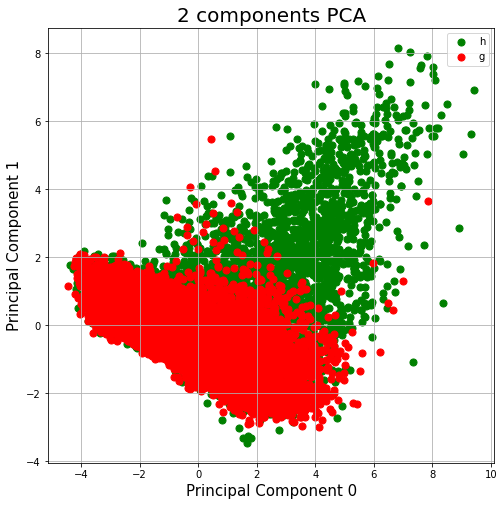

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 0', fontsize = 15)
ax.set_ylabel('Principal Component 1', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = ['h', 'g']
colors = ['g', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_comp 0'], finalDf.loc[indicesToKeep, 'principal_comp 1'], c = color, s = 50)
ax.legend(targets)
ax.grid()

Найдём оптимальное количество компонент:

In [22]:
X = data.drop(('class'), axis = 1)
y = data['class']

err_train_lst = []
err_test_lst = []

for i in range(2, 11):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X)
    columns = []
    for j in range(0, i):
        columns.append(f"principal_comp {j}")
    principalDf = pd.DataFrame(data=principalComponents, columns=columns)
    finalDf = pd.concat([principalDf, y], axis=1)

    X_ = finalDf.drop(('class'), axis = 1)
    y_ = finalDf['class']
    feature_names = X_.columns

    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state = 16)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_test_predict = rf.predict(X_test)
    y_train_predict = rf.predict(X_train)
    pca_rf_err_test  = np.mean(y_test  != y_test_predict)
    pca_rf_err_train  = np.mean(y_train != y_train_predict)
    err_train_lst.append(pca_rf_err_train)
    err_test_lst.append(pca_rf_err_test)
    print("Количество компонент: {}".format(i))
    print("Ошибка на обучающем датасете: {}".format(pca_rf_err_train))
    print("Ошибка на тестовом датасете: {}".format(pca_rf_err_test))
    print(confusion_matrix(y_test, y_test_predict))

Количество компонент: 2
Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.2931125131440589
[[2072  400]
 [ 715  617]]
Количество компонент: 3
Ошибка на обучающем датасете: 6.572029442691903e-05
Ошибка на тестовом датасете: 0.2379074658254469
[[2202  270]
 [ 635  697]]
Количество компонент: 4
Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.21661409043112514
[[2245  227]
 [ 597  735]]
Количество компонент: 5
Ошибка на обучающем датасете: 6.572029442691903e-05
Ошибка на тестовом датасете: 0.17902208201892744
[[2249  223]
 [ 458  874]]
Количество компонент: 6
Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.17534174553101997
[[2265  207]
 [ 460  872]]
Количество компонент: 7
Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.176130389064143
[[2249  223]
 [ 447  885]]
Количество компонент: 8
Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.16219768664563616
[[2271  201]
 [ 416  916]]
Количество компонент: 9
Ошибка

Построим график зависимости значения ошибки от количества компонент:

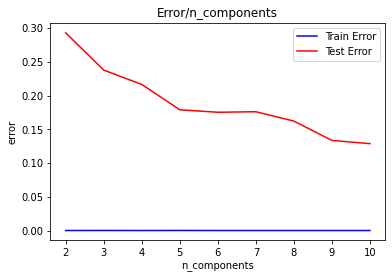

In [23]:
components = np.arange(2, 11)
plt.plot(components, err_train_lst, 'b', label="Train Error")
plt.plot(components, err_test_lst, 'r', label="Test Error")
plt.title('Error/n_components')
plt.xlabel('n_components')
plt.ylabel('error')
plt.legend()

Использование метода главных компонент нецелесообразно, так как значения ошибки на тестовой и обучающей выборке возрастают. 

# LDA + Random Forest

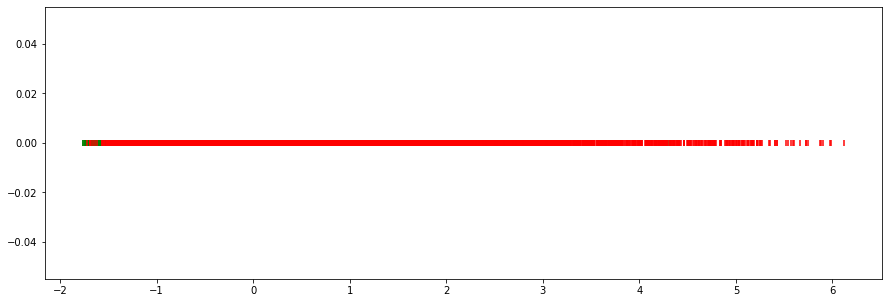

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit(X, y).transform(X)

colors = []
for i in y:
    if i == 'g':
        colors.append('g')
    else:
        colors.append('r')

fig = plt.figure(figsize = (15,5))
ax = fig.subplots()

ax.scatter(X_lda[:,0], [0]*len(X_lda), c = colors, marker='|')
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size = 0.2, random_state = 16)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)
lda_rf_err_test  = np.mean(y_test  != y_test_predict)
lda_rf_err_train  = np.mean(y_train != y_train_predict)
print("Ошибка на обучающем датасете: {}".format(lda_rf_err_train))
print("Ошибка на тестовом датасете: {}".format(lda_rf_err_test))
print(confusion_matrix(y_test, y_test_predict))

Ошибка на обучающем датасете: 0.0002628811777076761
Ошибка на тестовом датасете: 0.2941640378548896
[[1918  554]
 [ 565  767]]


Использование LDA так же, как и PCA нецелесообразно.